In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('C:/Users/admin/Downloads/Training_Dataset_Crédit_immobilier.csv')

In [5]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [69]:
data.shape

(614, 13)

In [70]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [68]:
data.dtypes


Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

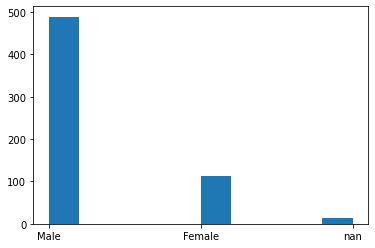

In [74]:
x = np.array(data['Gender'].astype(str))
plt.hist(x)
plt.show()

In [35]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [36]:
Col_Cat = ['Gender','Married','Education','Self_Employed','Property_Area','Dependents']
Col_Num_Scal = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
Col_Num = ['Credit_History']

In [76]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler , OneHotEncoder

In [81]:
Transform_Col_Cat = Pipeline(steps = [
    ('imputation', SimplerImputer(strategy='constant',fill_value = 'missing')),
    ('binarisation', OneHotEncoder(handle_unknown='ignore'))
])

Transform_Col_Num = Pipeline(steps = [
    ('imputation', SimpleImputer(strategy='constant',fill_value = 99))
])

Transform_Col_Num_Scal = Pipeline(steps = [
    ('imputation', SimpleImputer(strategy='median')),
    ('Scaler',StandardScaler())
])

In [82]:
from sklearn.compose import ColumnTransformer

In [80]:
pre_traitement = ColumnTransformer(
transformers =[
    ('numerique1',Transform_Col_Num,Col_Num),
    ('numerique2',Transform_Col_Num_Scal,Col_Num_Scal),
    ('catégorique',Transform_Col_Cat,Col_Cat)
])

In [84]:
from sklearn import ensemble

In [85]:
modele_pipeline = Pipeline(steps = [
    ('pretraitement',pre_traitement),
    ('classification',ensemble.RandomForestClassifier())
])

In [129]:
data_X = data.columns[1:-1]
data_Y = data.columns[-1]
data_Y

'Loan_Status'

In [87]:
modele_pipeline.fit(data[data_X],data[data_Y])

Pipeline(steps=[('pretraitement',
                 ColumnTransformer(transformers=[('numerique1',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer(fill_value=99,
                                                                                 strategy='constant'))]),
                                                  ['Credit_History']),
                                                 ('numerique2',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('Scaler',
                                                                   StandardScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantInc

In [103]:
modele_pipeline.predict_proba(data[data_X])

array([[0.  , 1.  ],
       [0.71, 0.29],
       [0.08, 0.92],
       ...,
       [0.04, 0.96],
       [0.01, 0.99],
       [0.96, 0.04]])

In [91]:
data_test = pd.read_csv('C:/Users/admin/Downloads/Test_Dataset_Crédit_immobilier.csv')

In [104]:
scores = modele_pipeline.predict_proba(data_test[data_X])

In [105]:
scores

array([[0.2 , 0.8 ],
       [0.07, 0.93],
       [0.17, 0.83],
       [0.24, 0.76],
       [0.61, 0.39],
       [0.39, 0.61],
       [0.35, 0.65],
       [0.84, 0.16],
       [0.16, 0.84],
       [0.02, 0.98],
       [0.57, 0.43],
       [0.33, 0.67],
       [0.22, 0.78],
       [0.78, 0.22],
       [0.11, 0.89],
       [0.11, 0.89],
       [0.2 , 0.8 ],
       [0.11, 0.89],
       [0.39, 0.61],
       [0.24, 0.76],
       [0.15, 0.85],
       [0.44, 0.56],
       [0.58, 0.42],
       [0.26, 0.74],
       [0.4 , 0.6 ],
       [0.62, 0.38],
       [0.13, 0.87],
       [0.42, 0.58],
       [0.02, 0.98],
       [0.16, 0.84],
       [0.11, 0.89],
       [0.06, 0.94],
       [0.33, 0.67],
       [0.16, 0.84],
       [0.03, 0.97],
       [0.83, 0.17],
       [0.17, 0.83],
       [0.1 , 0.9 ],
       [0.27, 0.73],
       [0.22, 0.78],
       [0.19, 0.81],
       [0.22, 0.78],
       [0.11, 0.89],
       [0.36, 0.64],
       [0.25, 0.75],
       [0.37, 0.63],
       [0.34, 0.66],
       [0.05,

In [125]:
scoreOutput={j:k for j,k in zip(data_test['Loan_ID'],scores)}
scoreOutput

{'LP001015': array([0.2, 0.8]),
 'LP001022': array([0.07, 0.93]),
 'LP001031': array([0.17, 0.83]),
 'LP001035': array([0.24, 0.76]),
 'LP001051': array([0.61, 0.39]),
 'LP001054': array([0.39, 0.61]),
 'LP001055': array([0.35, 0.65]),
 'LP001056': array([0.84, 0.16]),
 'LP001059': array([0.16, 0.84]),
 'LP001067': array([0.02, 0.98]),
 'LP001078': array([0.57, 0.43]),
 'LP001082': array([0.33, 0.67]),
 'LP001083': array([0.22, 0.78]),
 'LP001094': array([0.78, 0.22]),
 'LP001096': array([0.11, 0.89]),
 'LP001099': array([0.11, 0.89]),
 'LP001105': array([0.2, 0.8]),
 'LP001107': array([0.11, 0.89]),
 'LP001108': array([0.39, 0.61]),
 'LP001115': array([0.24, 0.76]),
 'LP001121': array([0.15, 0.85]),
 'LP001124': array([0.44, 0.56]),
 'LP001128': array([0.58, 0.42]),
 'LP001135': array([0.26, 0.74]),
 'LP001149': array([0.4, 0.6]),
 'LP001153': array([0.62, 0.38]),
 'LP001163': array([0.13, 0.87]),
 'LP001169': array([0.42, 0.58]),
 'LP001174': array([0.02, 0.98]),
 'LP001176': array([

In [127]:
import joblib

In [128]:
joblib.dump(modele_pipeline,'modele_pipeline.pkl')

['modele_pipeline.pkl']